# Single instance cavity 
## Percolating and non-percolating phase of  ''AND out-component''
In this section we compute the microscopic dynamics and we compare it with macroscopic cavity equation

In [ ]:
from pylab import *
%matplotlib inline
import sys
import pickle
import pandas as pd
import inspect
sys.path.insert(0, "../lib")# add the library folder to the path I look for modules
import latexify# execute function latexify for plots coherent with latex
import load_mathematica_tb

In [2]:
def load_obj(name,prefix="." ):
    print(prefix+'/dic-' + name + '.pkl')
    with open(prefix+'/dic-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)        

Dynamics:
- percolation of the giant component
$$
\begin{aligned}
n_i(\tau+1)&=&\chi_i\left(1-\prod_{\mu \in \partial _i^{\mathrm{in}}}(1-n_\mu(\tau))\right)\, \\
n_\mu(\tau)&=&\prod_{i\in \partial _\mu^{\mathrm{in}}}n_i(\tau) \ .
\end{aligned}
$$
- activation dynamics
$$
\begin{aligned}
n_i(\tau+1)&=&\left(1-\chi_i \right)\left(1-\prod_{\mu \in \partial _i^{\mathrm{in}}}(1-n_\mu(\tau)\right)+\chi_i \ ,\\
n_\mu(\tau)&=&\prod_{i\in \partial _\mu^{\mathrm{in}}}n_i(\tau)\ ,
\end{aligned}
$$

Consider the heatmap for the percolation problem. 
Find the transition curve from the numerical solution for the macroscopic cavity of the perturbed theory, as  computed from mathematica. We use a method ```get_transition_line()```

The transition curve for the discontinuous transition is obtained by the values of connectivity where a jump in the heatmap happens. We look here simply where a transition from a value below $1/2$ to a value above. For more look at method ```get_transition_line``` in the class ```load_mathematica_tb```

Let us compute for the perturbation of the giant "AND out component"

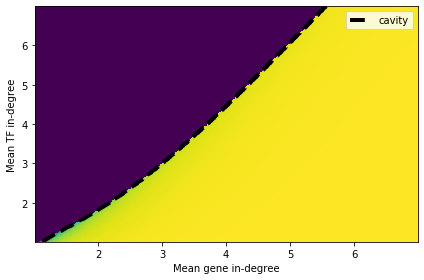

In [6]:
on = load_mathematica_tb.cavity("../macroscopic-cavity/")
on.heatmap()
c_thr_on,d_thr_on = on.get_transition_line()#extract macroscopic cavity transition line
plot(c_thr_on+1,1+d_thr_on,'k--',lw=4,label="cavity")
plt.legend()
plt.tight_layout()


Let us compute for the perturbation of the non percolating phase

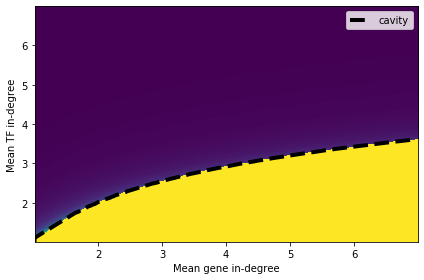

In [13]:
off = load_mathematica_tb.cavity("../macroscopic-cavity/",False)
off.heatmap()
c_thr_off,d_thr_off = off.get_transition_line()#extract macroscopic cavity transition line
plot(c_thr_off+1,1+d_thr_off,'k--',lw=4,label="cavity")
plt.legend()
plt.tight_layout()


## Single instance cavity simulations
### How to run simulations
Considering that nice graphs requires long simulations, I create a python script called percolation.py. Execute this from terminal and then load data here.
In terminal type:

```
python percolation.py --ds 0.0001 4 50 --cs 0.0001 4 70 -N1 10000 -N2 10000
--perc_fraction 0.95
```

which means:
```python
ds=arange(0.0001,4,50)
cs=arange(0.0001,4,70)```

Two sets of simulations are performed for the given set of parameter. The first one starts analyse the percolating phase, with $p=0.95$ . The second one the non-percolating phase, with $p = 0.05$.

In [5]:
perc=0.95
#load data from simulation
dic=load_obj("magnetisation",".")
ds=dic["ds"]# this is the paramenter of the Poisson distribution for the out-degree of genes, i.e.<d^{out}>= ds+1
cs=dic["cs"]
N1=dic["N1"]
N2=dic["N2"]
data_on=dic["data_on"]
data_off=dic["data_off"]
alpha=N2/N1


./dic-magnetisation.pkl


#### stability of the percolating phase

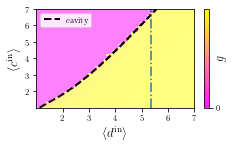

In [18]:
latexify.latexify(columns=2)

cmap="spring"

imshow(data_on[:,:,0],extent=(cs[0]+1,cs[-1]+1,ds[0]+1,ds[-1]+1),origin="lower", aspect="auto",cmap=cmap,alpha=0.5)
c_thr_on,d_thr_on = on.get_transition_line()#extract macroscopic cavity transition line
plot(c_thr_on+1,1+d_thr_on,'k--',lw=2,label="cavity")


cbar=colorbar(cmap=cmap)
#cbar.ax.set_ylabel('Average gene activation', rotation=270)
ylim(ds[0]+1,ds[-1]+1)




xlabel("$\\langle d^{\mathrm{in}} \\rangle$",fontsize=13)
ylabel("$\\langle c^{\mathrm{in}} \\rangle$",fontsize=13)
legend()

cbar.set_label("$g$",rotation=90,fontsize=12,labelpad=-5)
cbar.set_ticks([0,1])
cbar.patch.set_facecolor("none")
i=50
axvline(cs[i]+1,ls="-.")
tight_layout()
savefig("TF_on.pdf")


#### stability of the non percolating phase

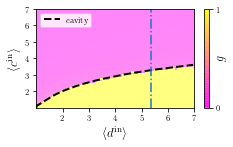

In [19]:
c_thr_off,d_thr_off = off.get_transition_line()
imshow(data_off[:,:,0],extent=(cs[0]+1,cs[-1]+1,ds[0]+1,ds[-1]+1),origin="lower", aspect="auto",cmap="spring",vmin=0,vmax=1,alpha=0.5)

ylim(ds[0]+1,ds[-1]+1)

plot(c_thr_off+1,d_thr_off+1,"--k",lw=2,label="cavity")

xlabel("$\\langle d^{\mathrm{in}} \\rangle$",fontsize=13)
ylabel("$\\langle c^{\mathrm{in}} \\rangle$",fontsize=13)
cbar=colorbar()
cbar.set_label("$g$",rotation=90,fontsize=12,labelpad=-5)
cbar.set_ticks([0,1])
axvline(cs[i]+1,ls="-.")
legend()
tight_layout()
savefig("TF_off.pdf")


#### Difference between the two to highlight histeresis

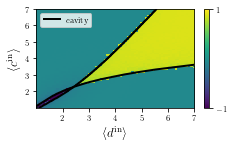

In [20]:
#figure(figsize=(4,3))
#title("Gene expr. level,RC initially on - off ")
imshow(data_on[:,:,0]-data_off[:,:,0],extent=(cs[0]+1,cs[-1]+1,ds[0]+1,ds[-1]+1),origin="lower", aspect="auto",vmin=-1,vmax=1)

#plot(cs+1,1+(1-alpha)*where(alpha<1,1,0)+alpha *log(1 + cs*alpha))# for d larger then this,the histeresys begins
#plot(cs+1,1+(-1 +exp(cs*alpha) )*alpha+(alpha-1)*where(alpha<1,1,0)) # for d larger then this, the histeresys terminate
ylim(ds[0]+1,ds[-1]+1)
xlabel("$\\langle d^{\mathrm{in}} \\rangle$",fontsize=13)
ylabel("$\\langle c^{\mathrm{in}} \\rangle$",fontsize=13)
plot(c_thr_on+1,d_thr_on+1,"-k",lw=2)
plot(c_thr_off+1,d_thr_off+1,"-k",lw=2,label="cavity")
legend()
cbar=colorbar()
#cbar.set_label("$g_{on}-g_{off}$",rotation=90,fontsize=12,labelpad=-15)
cbar.set_ticks([-1,1])
tight_layout()
savefig("histeresys.pdf")

#### slice in correspondence of the vertical dot dashed line

4.3505797101449275


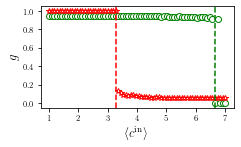

In [21]:

plot(ds+1,data_on[:,i,0],"o",c="g",mfc="w",label="perc.")
plot(ds+1,data_off[:,i,0],"*",c="r",mfc="w",label="non-perc.")

axvline(d_thr_on[argmin((c_thr_on-cs[i])**2)]+1,c="g",ls="--")
axvline(d_thr_off[argmin((c_thr_off-cs[i])**2)]+1,c="r",ls="--")
print(cs[i])
#legend(fontsize=12)
xlabel('$\\langle c ^\mathrm{in}\\rangle$',fontsize=13)
ylabel("$g$",fontsize=13)
tight_layout()
#savefig("slice.pdf")
